数据集基本信息:
<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 0 to 783
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MJD(days)  783 non-null    float64
 1   PT-TT（s）   783 non-null    float64
dtypes: float64(2)
memory usage: 18.4 KB
None

缺失值统计:
MJD(days)    0
PT-TT（s）     0
dtype: int64


<Figure size 1200x1000 with 0 Axes>

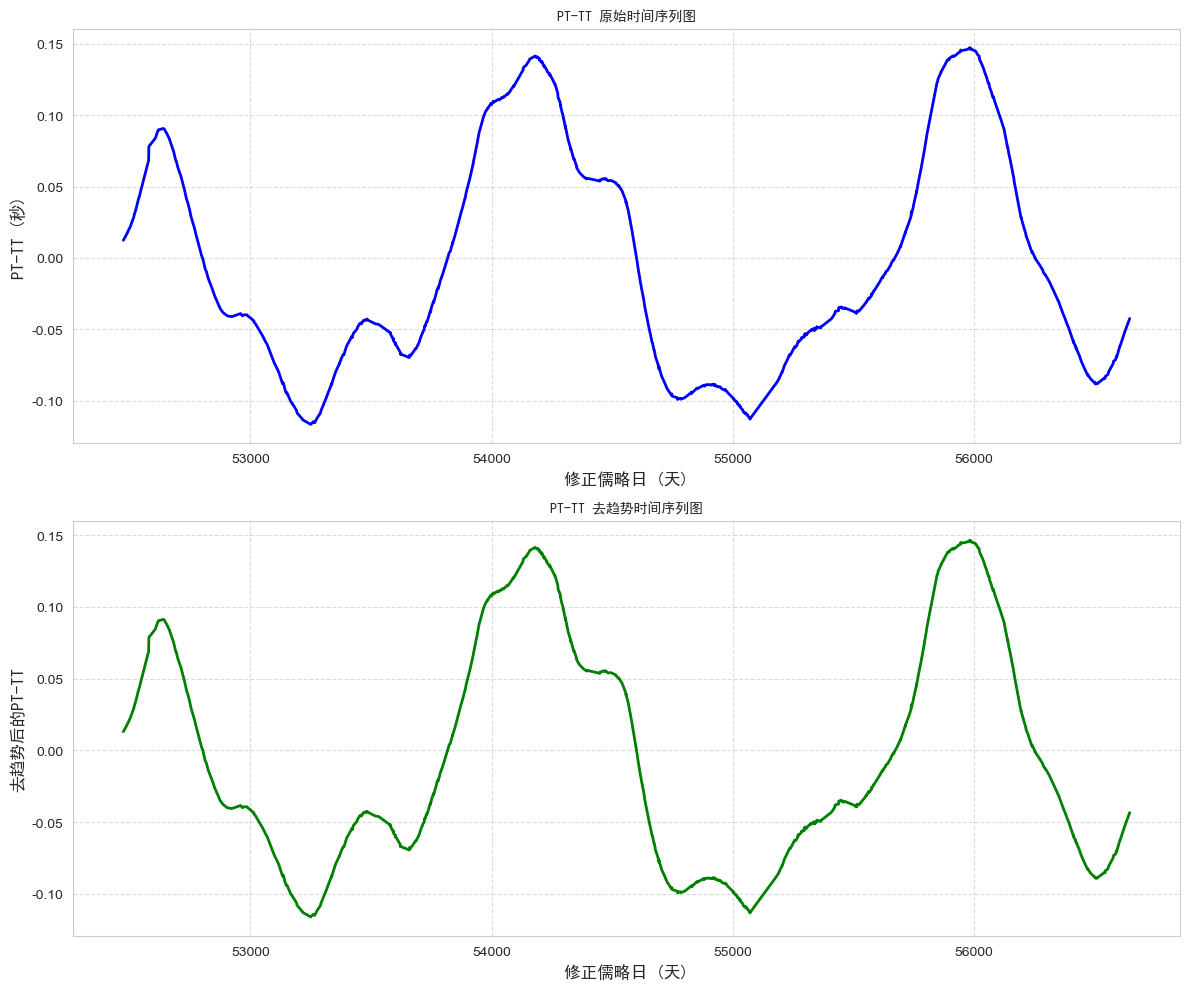

C:\Users\tk\AppData\Local\Temp\ipykernel_6356\2858090553.py:76: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
C:\Users\tk\AppData\Local\Temp\ipykernel_6356\2858090553.py:76: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  plt.tight_layout()
d:\software\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\software\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


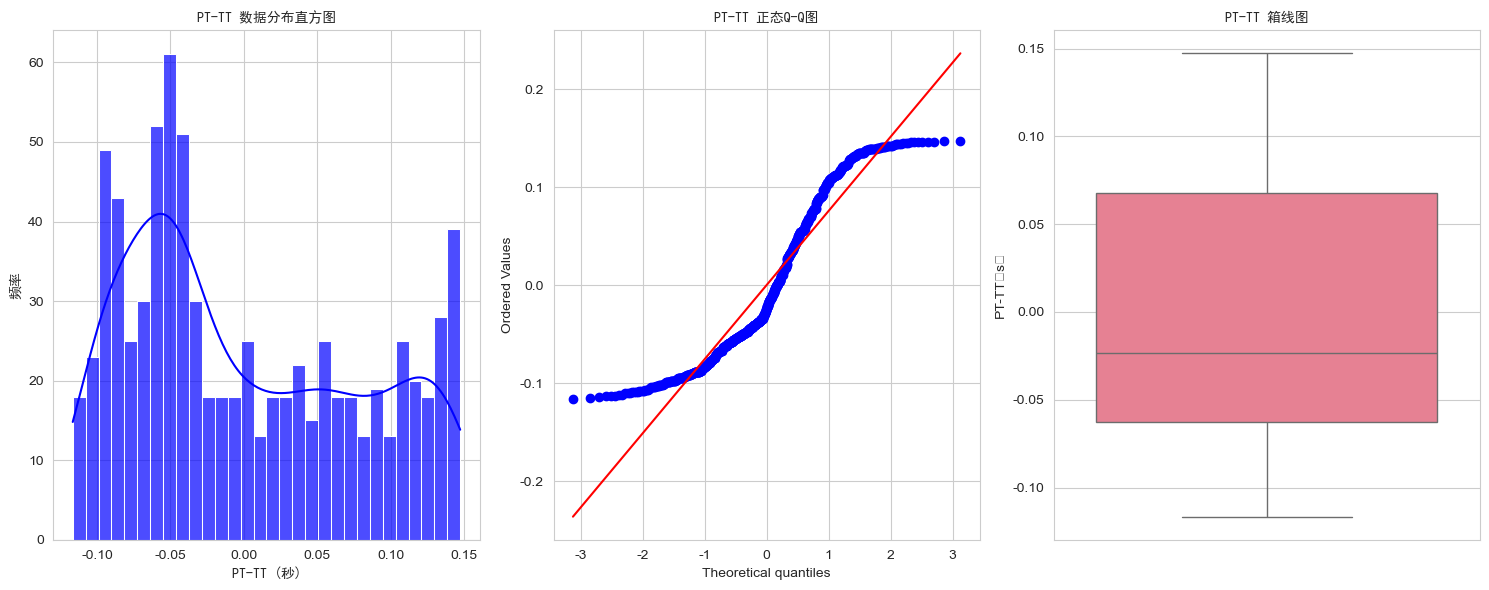


正态性检验结果:
D'Agostino-Pearson检验: 统计量=403.5258, p值=0.0000

Anderson-Darling检验:
统计量: 20.8313
15.0% 临界值: 0.573
10.0% 临界值: 0.653
5.0% 临界值: 0.783
2.5% 临界值: 0.913
1.0% 临界值: 1.086

详细的描述性统计信息：
count    783.000000
mean       0.000113
std        0.078553
min       -0.116559
25%       -0.062415
50%       -0.023151
75%        0.067839
max        0.147322
Name: PT-TT（s）, dtype: float64

偏度 (Skewness): 0.4280
峰度 (Kurtosis): -1.1478

详细分位数分析 (5%间隔):
0.05   -0.100111
0.10   -0.092157
0.15   -0.084921
0.20   -0.074063
0.25   -0.062415
0.30   -0.055673
0.35   -0.050272
0.40   -0.043669
0.45   -0.037373
0.50   -0.023151
0.55   -0.005282
0.60    0.010647
0.65    0.032406
0.70    0.051140
0.75    0.067839
0.80    0.087981
0.85    0.108674
0.90    0.122219
0.95    0.138171
1.00    0.147322
Name: PT-TT（s）, dtype: float64


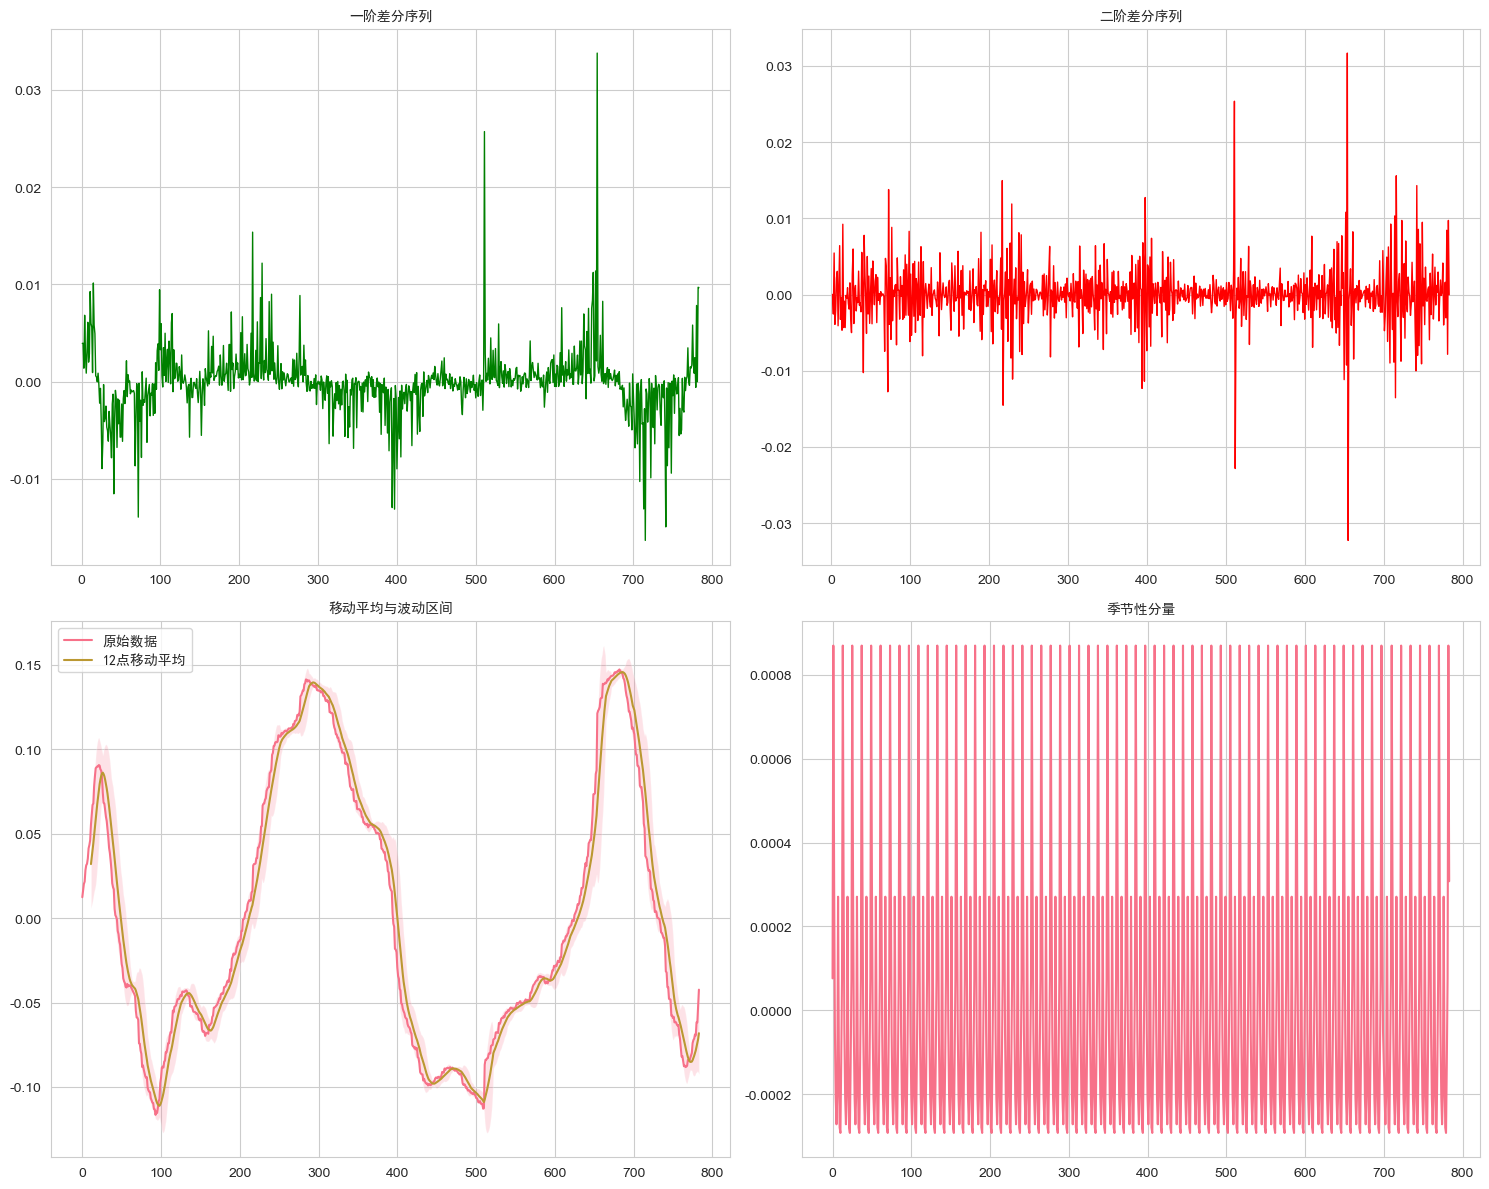

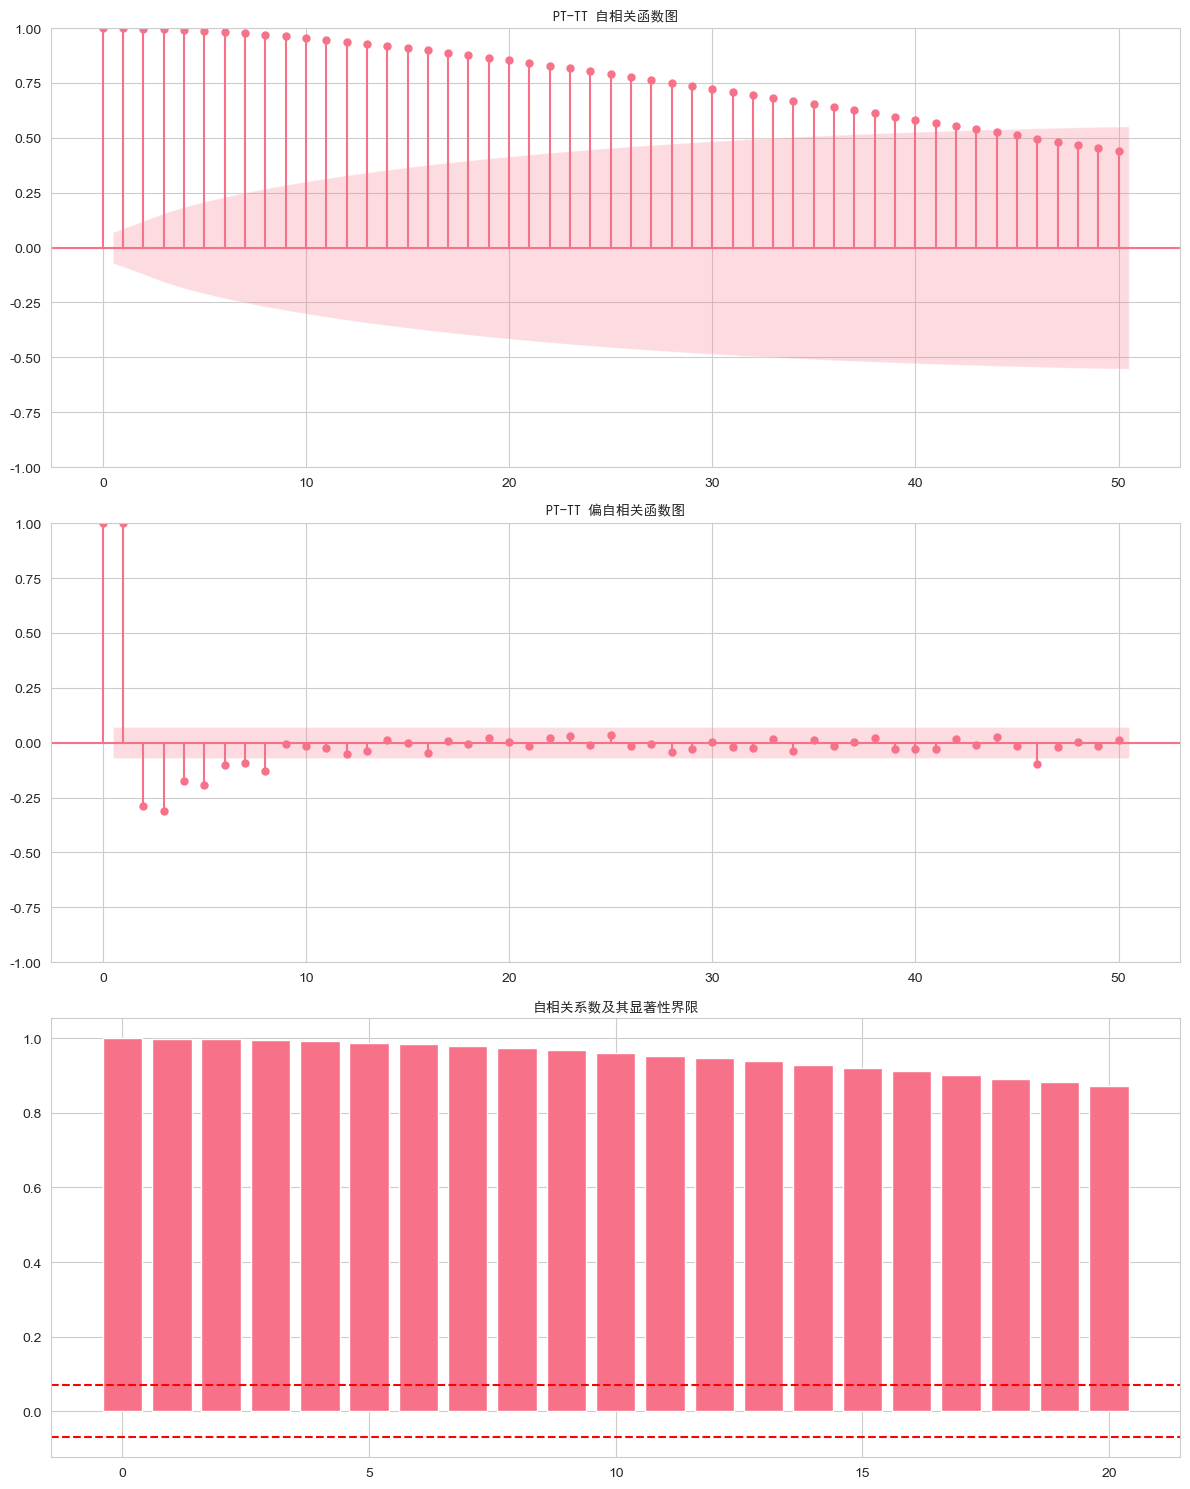


增强的时间序列统计分析:
序列长度: 783
时间跨度: 4172.76 天
平均时间间隔: 5.3360 天
一阶差分均值: -0.000070
一阶差分标准差: 0.003473
二阶差分均值: 0.000007
二阶差分标准差: 0.004104

线性趋势检验:
斜率: 0.000002
R平方: 0.000036
P值: 0.866447
P值: 0.866447
P值: 0.866447


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
from scipy.signal import detrend
from scipy.stats import normaltest, anderson
import matplotlib.font_manager as fm

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
sns.set_style("whitegrid")
sns.set_palette("husl")

# Step 1: 数据加载与预处理
file_path = 'q1/Attachment 1.xlsx'
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

# 转换数据类型并处理异常值
df['MJD(days)'] = pd.to_numeric(df['MJD(days)'], errors='coerce')
df['PT-TT（s）'] = pd.to_numeric(df['PT-TT（s）'], errors='coerce')

# 删除缺失值并显示数据基本信息
df_cleaned = df.dropna()
print("数据集基本信息:")
print(df_cleaned.info())
print("\n缺失值统计:")
print(df_cleaned.isnull().sum())

# Step 2: 增强的时间序列基本分析
plt.figure(figsize=(12, 10))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 原始时间序列
ax1.plot(df_cleaned['MJD(days)'], df_cleaned['PT-TT（s）'], 'b-', linewidth=2)
ax1.set_title('PT-TT 原始时间序列图', fontsize=14, fontproperties='SimHei')
ax1.set_xlabel('修正儒略日 (天)', fontsize=12, fontproperties='SimHei')
ax1.set_ylabel('PT-TT (秒)', fontsize=12, fontproperties='SimHei')
ax1.grid(True, linestyle='--', alpha=0.7)

# 去趋势后的时间序列
detrended = detrend(df_cleaned['PT-TT（s）'])
ax2.plot(df_cleaned['MJD(days)'], detrended, 'g-', linewidth=2)
ax2.set_title('PT-TT 去趋势时间序列图', fontsize=14, fontproperties='SimHei')
ax2.set_xlabel('修正儒略日 (天)', fontsize=12, fontproperties='SimHei')
ax2.set_ylabel('去趋势后的PT-TT', fontsize=12, fontproperties='SimHei')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Step 3: 增强的数据分布分析
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 3)

# 直方图和核密度估计
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(df_cleaned['PT-TT（s）'], kde=True, bins=30, color='blue', alpha=0.7, ax=ax1)
ax1.set_title('PT-TT 数据分布直方图', fontsize=12, fontproperties='SimHei')
ax1.set_xlabel('PT-TT (秒)', fontsize=10, fontproperties='SimHei')
ax1.set_ylabel('频率', fontsize=10, fontproperties='SimHei')

# Q-Q图
ax2 = fig.add_subplot(gs[0, 1])
stats.probplot(df_cleaned['PT-TT（s）'], dist="norm", plot=ax2)
ax2.set_title('PT-TT 正态Q-Q图', fontsize=12, fontproperties='SimHei')

# 箱线图
ax3 = fig.add_subplot(gs[0, 2])
sns.boxplot(y=df_cleaned['PT-TT（s）'], ax=ax3)
ax3.set_title('PT-TT 箱线图', fontsize=12, fontproperties='SimHei')

plt.tight_layout()
plt.show()

# 正态性检验
print("\n正态性检验结果:")
stat, p_value = normaltest(df_cleaned['PT-TT（s）'])
print(f"D'Agostino-Pearson检验: 统计量={stat:.4f}, p值={p_value:.4f}")

result = anderson(df_cleaned['PT-TT（s）'])
print("\nAnderson-Darling检验:")
print(f"统计量: {result.statistic:.4f}")
for i in range(len(result.critical_values)):
    print(f"{result.significance_level[i]}% 临界值: {result.critical_values[i]}")

# Step 4: 增强的描述性统计
desc_stats = df_cleaned['PT-TT（s）'].describe()
skewness = df_cleaned['PT-TT（s）'].skew()
kurtosis = df_cleaned['PT-TT（s）'].kurt()

print("\n详细的描述性统计信息：")
print(desc_stats)
print(f"\n偏度 (Skewness): {skewness:.4f}")
print(f"峰度 (Kurtosis): {kurtosis:.4f}")

# 计算更详细的分位数
quantiles = df_cleaned['PT-TT（s）'].quantile(np.arange(0.05, 1.05, 0.05))
print("\n详细分位数分析 (5%间隔):")
print(quantiles)

# Step 5: 增强的时间序列特征分析
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 一阶差分
diff1 = df_cleaned['PT-TT（s）'].diff().dropna()
axes[0,0].plot(diff1.index, diff1.values, 'g-', linewidth=1)
axes[0,0].set_title('一阶差分序列', fontsize=12, fontproperties='SimHei')
axes[0,0].grid(True)

# 二阶差分
diff2 = diff1.diff().dropna()
axes[0,1].plot(diff2.index, diff2.values, 'r-', linewidth=1)
axes[0,1].set_title('二阶差分序列', fontsize=12, fontproperties='SimHei')
axes[0,1].grid(True)

# 移动平均
rolling_mean = df_cleaned['PT-TT（s）'].rolling(window=12).mean()
rolling_std = df_cleaned['PT-TT（s）'].rolling(window=12).std()
axes[1,0].plot(df_cleaned.index, df_cleaned['PT-TT（s）'], label='原始数据')
axes[1,0].plot(df_cleaned.index, rolling_mean, label='12点移动平均')
axes[1,0].fill_between(df_cleaned.index, 
                      rolling_mean - 2*rolling_std,
                      rolling_mean + 2*rolling_std,
                      alpha=0.2)
axes[1,0].set_title('移动平均与波动区间', fontsize=12, fontproperties='SimHei')
axes[1,0].legend(prop={'family':'SimHei'})
axes[1,0].grid(True)

# 季节性分解
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_cleaned['PT-TT（s）'], period=12, extrapolate_trend='freq')
axes[1,1].plot(decomposition.seasonal)
axes[1,1].set_title('季节性分量', fontsize=12, fontproperties='SimHei')
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

# Step 6: 增强的相关性分析
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# 自相关函数图
plot_acf(df_cleaned['PT-TT（s）'], lags=50, ax=ax1)
ax1.set_title('PT-TT 自相关函数图', fontsize=14, fontproperties='SimHei')
ax1.grid(True)

# 偏自相关函数图
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_cleaned['PT-TT（s）'], lags=50, ax=ax2)
ax2.set_title('PT-TT 偏自相关函数图', fontsize=14, fontproperties='SimHei')
ax2.grid(True)

# 自相关系数的显著性检验
lags = 20
acf_values = pd.Series([1] + [stats.pearsonr(df_cleaned['PT-TT（s）'][:-i], 
                                            df_cleaned['PT-TT（s）'][i:])[0] 
                             for i in range(1, lags+1)])
confidence_interval = 1.96/np.sqrt(len(df_cleaned))
ax3.bar(range(lags+1), acf_values)
ax3.axhline(y=confidence_interval, color='r', linestyle='--')
ax3.axhline(y=-confidence_interval, color='r', linestyle='--')
ax3.set_title('自相关系数及其显著性界限', fontsize=14, fontproperties='SimHei')
ax3.grid(True)

plt.tight_layout()
plt.show()

# 输出增强的统计信息
print("\n增强的时间序列统计分析:")
print(f"序列长度: {len(df_cleaned)}")
print(f"时间跨度: {df_cleaned['MJD(days)'].max() - df_cleaned['MJD(days)'].min():.2f} 天")
print(f"平均时间间隔: {df_cleaned['MJD(days)'].diff().mean():.4f} 天")
print(f"一阶差分均值: {diff1.mean():.6f}")
print(f"一阶差分标准差: {diff1.std():.6f}")
print(f"二阶差分均值: {diff2.mean():.6f}")
print(f"二阶差分标准差: {diff2.std():.6f}")

# 趋势检验
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(range(len(df_cleaned)), df_cleaned['PT-TT（s）'])
print("\n线性趋势检验:")
print(f"斜率: {slope:.6f}")
print(f"R平方: {r_value**2:.6f}")
print(f"P值: {p_value:.6f}")
print(f"P值: {p_value:.6f}")
print(f"P值: {p_value:.6f}")
